In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [6]:
# df['Cabin'] = df['Cabin'].fillna(df["Cabin"].mode)

In [7]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
              ..
E68            1
C106           1
D37            1
D10 D12        1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [8]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    total_percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return total_percent_nan

In [9]:
percent_missing(df)

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [20]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

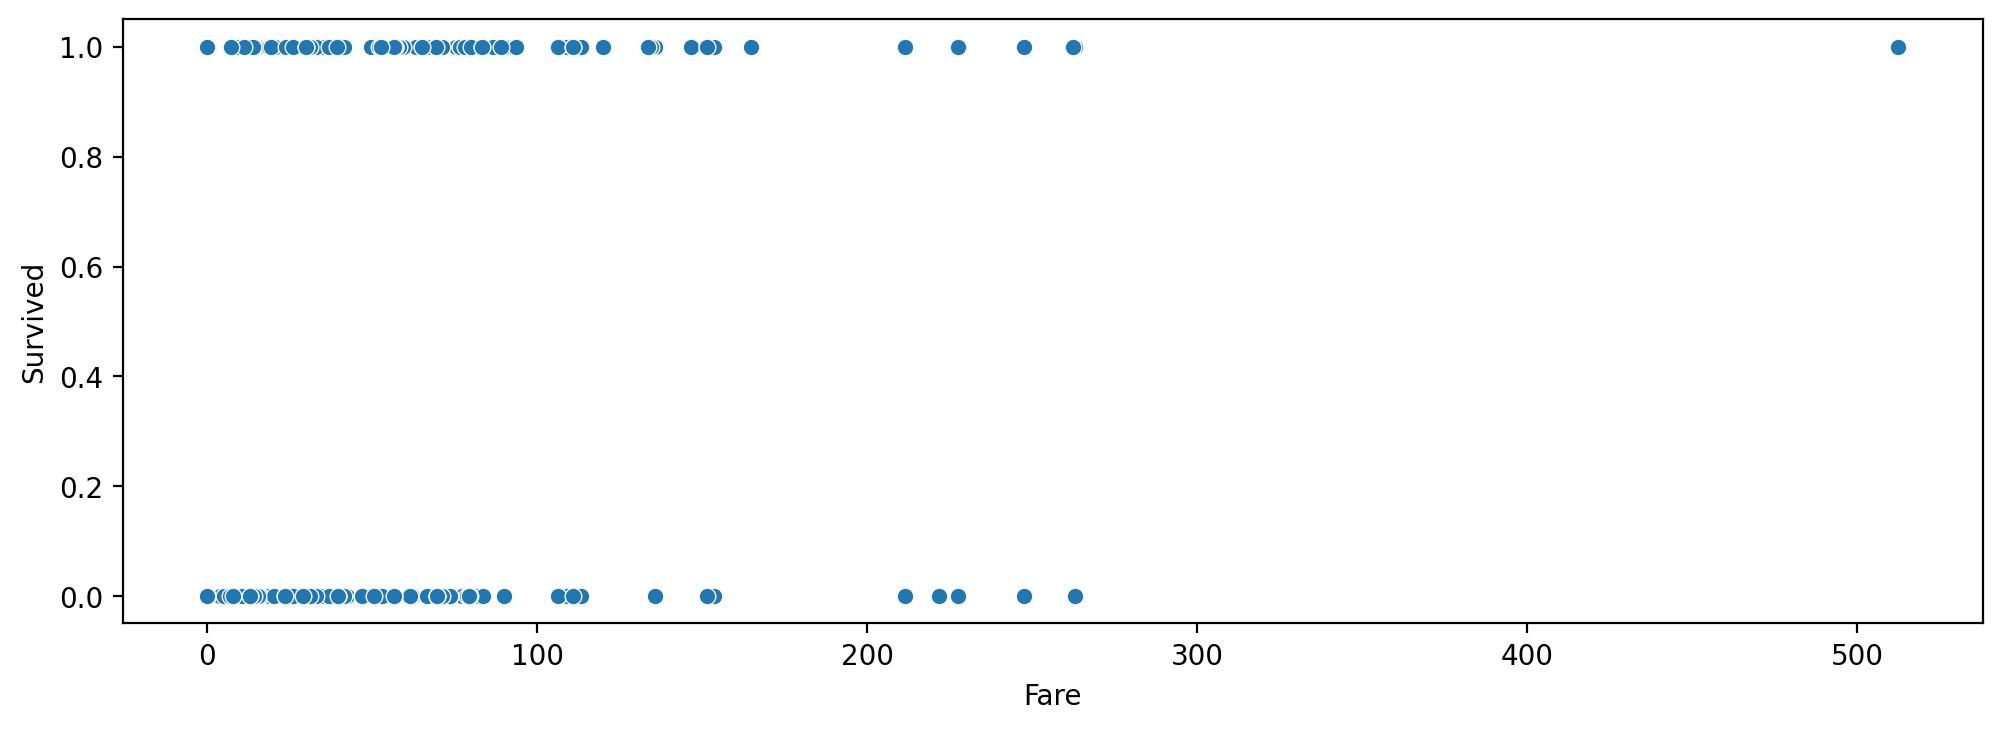

In [11]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='Fare',y='Survived')

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
df = df.drop('Cabin',axis=1)

In [16]:
df = df.drop('Name',axis=1)

In [17]:
df = df.drop('Ticket',axis=1)

In [18]:
df.shape

(891, 9)

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [23]:
df.to_csv("Cleaned_Train_Data.csv",index=False)

In [24]:
train_df = pd.read_csv("Cleaned_Train_Data.csv")

In [25]:
train_df.shape

(891, 9)

In [26]:
test_df = pd.read_csv("Cleaned_Test_data.csv")

In [29]:
test_df.shape

(418, 8)

In [30]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [31]:
main_df = pd.concat([train_df,test_df],axis=0)

In [32]:
main_df.shape

(1309, 9)

In [33]:
df_numeric_values = main_df.select_dtypes(exclude='object')

In [34]:
df_objective_values = main_df.select_dtypes(include='object')

In [35]:
df_objective_values = pd.get_dummies(df_objective_values,drop_first=True)

In [36]:
df_objective_values

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
413,1,0,1
414,0,0,0
415,1,0,1
416,1,0,1


In [37]:
main_df = pd.concat([df_numeric_values,df_objective_values],axis=1)

In [38]:
final_train_data = main_df.iloc[:891,:]

In [39]:
final_train_data.shape

(891, 10)

In [40]:
final_test_data = main_df.iloc[891:,:]

In [41]:
final_test_data = final_test_data.drop('Survived',axis=1)

In [42]:
final_test_data.shape

(418, 9)

In [43]:
final_train_data.to_csv("Final_Train_Data.csv",index=False)

In [44]:
final_test_data.to_csv("Final_Test_Data.csv",index=False)

In [45]:
df_numeric_values = df.select_dtypes(exclude='object')
df_objective_values = df.select_dtypes(include='object')

df_objective_values = pd.get_dummies(df_objective_values,drop_first=True)

In [46]:
df_objective_values

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0
